# Data Analysis

A brief data analysis of the human regressions and models' revisions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font='Futura', style="white")

In [3]:
corpora = ['mecol1_du', 'mecol2_enl2', 'nicenboim_es', 'potec_de', 'provo_en', 'rastros_ptbr']
models = ['stanza-bilstm', 'hf-trf']

## Human Data

Distribution of regression and skip probability by token and by subject for each eye-tracking corpus

In [4]:
data = {corpus_name: pd.read_csv(f'preprocessed/human_data/{corpus_name}_first-pass-regression-out.tsv', 
                                 sep='\t',
                                 index_col=0) 
                     for corpus_name in corpora}

In [5]:
for corpus_name in corpora:
    print(corpus_name, data[corpus_name].shape[0], data[corpus_name].shape[1]-2)

mecol1_du 2231 45
mecol2_enl2 1658 538
nicenboim_es 791 71
potec_de 1895 62
provo_en 2743 84
rastros_ptbr 2494 37


In [6]:
regression_dist_token = {}
regression_dist_subj = {}

for corpus_name in corpora:
   dist_reg = (data[corpus_name].drop('Token', axis=1)
                                .set_index('Identifier')
                                .replace({-1.: 0.}))
   regression_dist_token[corpus_name] = dist_reg.mean(axis=1).values
   regression_dist_subj[corpus_name] = dist_reg.mean(axis=0).values

dist_reg_token_df = pd.concat([pd.DataFrame(dist, columns=[name.split('_')[1]]) for name, dist in regression_dist_token.items()], axis=1)
dist_reg_subj_df = pd.concat([pd.DataFrame(dist, columns=[name.split('_')[1]]) for name, dist in regression_dist_subj.items()], axis=1)

findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not

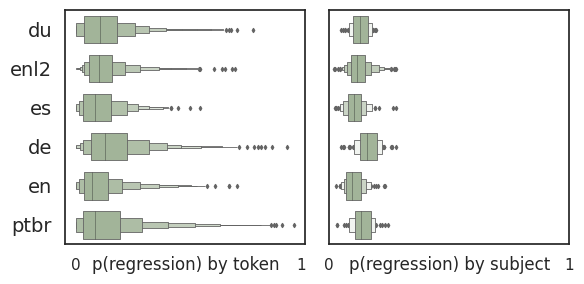

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

sns.boxenplot(dist_reg_token_df,
              color=(160/255, 184/255, 149/255, 1.0),
              orient='h',
              width=0.7,
              linewidth=0.6,
              flier_kws={'s': 4},
              ax=ax1)
plt.xlim(0, 1)
ax1.set_xticks([0, 1])
ax1.set_xlabel('p(regression) by token', labelpad=-12)
ax1.tick_params(axis='y', which='major', labelsize=14)

sns.boxenplot(dist_reg_subj_df,
              color=(160/255, 184/255, 149/255, 1.0),
              orient='h',
              width=0.7,
              linewidth=0.6,
              flier_kws={'s': 4},
              ax=ax2)
plt.xlim(0, 1)
ax2.set_xticks([0, 1])
ax2.set_xlabel('p(regression) by subject', labelpad=-12)

plt.tight_layout()
plt.savefig('figures/p_reg.pdf')
plt.show()

In [8]:
skip_dist_token = {}
skip_dist_subj = {}
for corpus_name in corpora:
   dist_skip = (data[corpus_name].drop('Token', axis=1)
                                 .set_index('Identifier')
                                 .replace({1.: 0., -1.: 1.}))
   skip_dist_token[corpus_name] = dist_skip.mean(axis=1).values
   skip_dist_subj[corpus_name] = dist_skip.mean(axis=0).values

dist_skip_token_df = pd.concat([pd.DataFrame(dist, columns=[name.split('_')[1]]) for name, dist in skip_dist_token.items()], axis=1)
dist_skip_subj_df = pd.concat([pd.DataFrame(dist, columns=[name.split('_')[1]]) for name, dist in skip_dist_subj.items()], axis=1)

findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not found.
findfont: Font family 'Futura' not

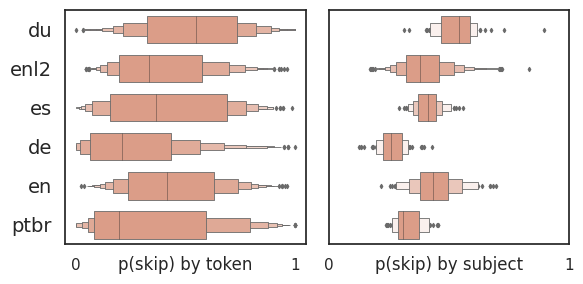

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

sns.boxenplot(dist_skip_token_df,
              color='darksalmon',
              orient='h',
              width=0.7,
              linewidth=0.6,
              flier_kws={'s': 4},
              ax=ax1)
plt.xlim(0, 1)
ax1.set_xticks([0, 1])
ax1.set_xlabel('p(skip) by token', labelpad=-12)
ax1.tick_params(axis='y', which='major', labelsize=14)

sns.boxenplot(dist_skip_subj_df,
              color='darksalmon',
              orient='h',
              width=0.7,
              linewidth=0.6,
              flier_kws={'s': 4},
              ax=ax2)
plt.xlim(0, 1)
ax2.set_xticks([0, 1])
ax2.set_xlabel('p(skip) by subject', labelpad=-12)

plt.tight_layout()
plt.savefig('figures/p_skip.pdf')
plt.show()

## Models Data

In [10]:
model_data = {
    f'{corpus_name}_{model_name}': pd.read_csv(f'preprocessed/model_data/{corpus_name}_{model_name}_revisions.tsv', 
                                               sep='\t', index_col=0) 
                                   for corpus_name in corpora for model_name in models}

In [11]:
percs = pd.DataFrame()

for name, df in model_data.items():

   df = model_data[name]
   corpus, lang, model = name.split('_')
   df = (df.drop('Token', axis=1)
            .mean(axis=0)
            .to_frame(name='percs')
            .reset_index(names='rev_task')
            )
   df['corpus'] = corpus
   df['lang'] = lang
   df['model'] = model
   percs = pd.concat([percs, df])

percs[['revision', 'task']] = percs['rev_task'].str.split(':', expand=True)
percs = percs.drop(['rev_task', 'corpus'], axis=1).replace({'effective-revision': 'effective'})
percs = percs[percs.revision != 'convenient-revision']
percs = percs[percs.task.isin(['pos', 'upos', 'deprel', 'head'])]

percs = percs.pivot(index=['model', 'task'], columns=['lang', 'revision'], values='percs') * 100

In [12]:
percs

lang                         du                  enl2                    es   
revision               revision  effective   revision  effective   revision   
model         task                                                            
hf-trf        deprel  63.917526  52.442851  67.973462  57.659831  48.925411  \
              head    67.548185  38.009861  69.059107  37.213510  57.269279   
              pos      9.816226   6.275213   7.840772   6.091677   1.896334   
stanza-bilstm deprel  58.449126  47.198566  60.735826  54.523522  55.752212   
              head    65.755267  38.323622  66.948130  38.600724  61.314791   
              upos    12.953832  11.519498  11.700844  10.675513   6.321113   

lang                                    de                    en              
revision              effective   revision  effective   revision  effective   
model         task                                                            
hf-trf        deprel  44.374210  73.667546  56.358839  66.678819  58.767773  \
              head    41.466498  74.564644  43.377309  69.303682  38.461538   
              pos      1.643489   5.013193   4.116095   8.093328   6.562158   
stanza-bilstm deprel  50.316056  53.562005  44.274406  60.991615  53.700328   
              head    43.362832  67.282322  40.369393  67.918338  39.300036   
              upos     5.436157  17.889182  15.514512  12.650383  11.265038   

lang                       ptbr             
revision               revision  effective  
model         task                          
hf-trf        deprel  52.806736  44.226143  
              head    61.387330  42.983160  
              pos      9.222133   7.618284  
stanza-bilstm deprel  54.009623  46.752205  
              head    60.344828  43.704892  
              upos    29.190056  27.105052

In [13]:
print(percs.to_latex(float_format="%.2f"))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
 & lang & \multicolumn{2}{r}{du} & \multicolumn{2}{r}{enl2} & \multicolumn{2}{r}{es} & \multicolumn{2}{r}{de} & \multicolumn{2}{r}{en} & \multicolumn{2}{r}{ptbr} \\
 & revision & revision & effective & revision & effective & revision & effective & revision & effective & revision & effective & revision & effective \\
model & task &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{hf-trf} & deprel & 63.92 & 52.44 & 67.97 & 57.66 & 48.93 & 44.37 & 73.67 & 56.36 & 66.68 & 58.77 & 52.81 & 44.23 \\
 & head & 67.55 & 38.01 & 69.06 & 37.21 & 57.27 & 41.47 & 74.56 & 43.38 & 69.30 & 38.46 & 61.39 & 42.98 \\
 & pos & 9.82 & 6.28 & 7.84 & 6.09 & 1.90 & 1.64 & 5.01 & 4.12 & 8.09 & 6.56 & 9.22 & 7.62 \\
\cline{1-14}
\multirow[t]{3}{*}{stanza-bilstm} & deprel & 58.45 & 47.20 & 60.74 & 54.52 & 55.75 & 50.32 & 53.56 & 44.27 & 60.99 & 53.70 & 54.01 & 46.75 \\
 & head & 65.76 & 38.32 & 66.95 & 38.60 & 61.31 & 43.36 & 67.28 & 40.37 & 67.92 & 39.30 &